This notebook is to validate AG informal dietary questions with the formal FFQ. Association between categorical and continuous variables were examined with Mann-Whiteney and Kruskal-Wallis tests, and the strength of correlation was quantified by the p-values after multiple comparison correction. Effect size was also calculated for Mann-Whitney test (reference: Fritz 2011, "Effect Size Estimates: Current Use, Calculations, and Interpretation), yet not for Kruskal-Wallis, as the later is hard to interpret and not comparable to the effect size for Mann-Whiteney test.

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import skbio
import scipy as sp
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages
% matplotlib inline

In [3]:
mapping = pd.read_csv('ag_map_with_alpha.txt', sep='\t', dtype=str, na_values='Unspecified')

## Vioscreen Questions on Alcohol

In [4]:
# three vioscreen variables on alcohol
mapping.vioscreen_alcohol_servings = pd.to_numeric(mapping.vioscreen_alcohol_servings)
mapping.vioscreen_a_bev = pd.to_numeric(mapping.vioscreen_a_bev)
mapping.vioscreen_alcohol = pd.to_numeric(mapping.vioscreen_alcohol)

vios_alcohol = ['vioscreen_alcohol_servings', 'vioscreen_a_bev', 'vioscreen_alcohol']

### Association between vioscreen alcohol variables and each AG alcohol related variables

In [5]:
# AG alcohol variable: acohol_comsumption
g0 = mapping.loc[mapping['alcohol_consumption'] == 'Yes']
g1 = mapping.loc[mapping['alcohol_consumption'] == 'No']

var_diet = 'alcohol_consumption'
results_alcohol_consumption = []
for var in vios_alcohol:
        u, pval = sp.stats.mannwhitneyu(g0[var], g1[var], alternative = 'two-sided')  
        ef = np.absolute(sp.stats.ranksums(g0[var], g1[var])[0]/np.sqrt(mapping.shape[0]))
        results_alcohol_consumption.append([var_diet, var, u, pval, ef])  
results_alcohol_consumption = pd.DataFrame(results_alcohol_consumption, 
                                           columns=['AG_dietary', 'vioscreen var', 'test statistic', 
                                                    'raw p-value', 'effect size'])
results_alcohol_consumption.set_index('AG_dietary', inplace=True)

In [6]:
# AG alcohol variable: alcohol_types_beercider
g0 = mapping.loc[mapping['alcohol_types_beercider'] == 'Yes']
g1 = mapping.loc[mapping['alcohol_types_beercider'] == 'No']

var_diet = 'alcohol_types_beercider'
results_beercider = []
for var in vios_alcohol:
        u, pval = sp.stats.mannwhitneyu(g0[var], g1[var], alternative = 'two-sided')
        ef = np.absolute(sp.stats.ranksums(g0[var], g1[var])[0]/np.sqrt(mapping.shape[0]))
        results_beercider.append([var_diet, var, u, pval, ef])  
results_beercider = pd.DataFrame(results_beercider, 
                                 columns=['AG_dietary', 'vioscreen var', 'test statistic', 
                                          'raw p-value', 'effect size'])
results_beercider.set_index('AG_dietary', inplace=True)

In [7]:
# AG alcohol variable: alcohol_types_red_wine
g0 = mapping.loc[mapping['alcohol_types_red_wine'] == 'Yes']
g1 = mapping.loc[mapping['alcohol_types_red_wine'] == 'No']

var_diet = 'alcohol_types_red_wine'
results_red_wine = []
for var in vios_alcohol:
        u, pval = sp.stats.mannwhitneyu(g0[var], g1[var], alternative = 'two-sided')  
        ef = np.absolute(sp.stats.ranksums(g0[var], g1[var])[0]/np.sqrt(mapping.shape[0]))
        results_red_wine.append([var_diet, var, u, pval, ef])  
results_red_wine = pd.DataFrame(results_red_wine, 
                                columns=['AG_dietary', 'vioscreen var', 'test statistic', 
                                         'raw p-value', 'effect size'])
results_red_wine.set_index('AG_dietary', inplace=True)

In [8]:
# AG alcohol variable: alcohol_types_sour_beers
g0 = mapping.loc[mapping['alcohol_types_sour_beers'] == 'Yes']
g1 = mapping.loc[mapping['alcohol_types_sour_beers'] == 'No']

var_diet = 'alcohol_types_sour_beers'
results_sour_beers = []
for var in vios_alcohol:
        u, pval = sp.stats.mannwhitneyu(g0[var], g1[var], alternative = 'two-sided') 
        ef = np.absolute(sp.stats.ranksums(g0[var], g1[var])[0]/np.sqrt(mapping.shape[0]))
        results_sour_beers.append([var_diet, var, u, pval, ef])  
results_sour_beers = pd.DataFrame(results_sour_beers, 
                                  columns=['AG_dietary', 'vioscreen var', 'test statistic', 
                                           'raw p-value', 'effect size'])
results_sour_beers.set_index('AG_dietary', inplace=True)

In [9]:
# AG alcohol variable: alcohol_types_spiritshared_alcohol
g0 = mapping.loc[mapping['alcohol_types_spiritshard_alcohol'] == 'Yes']
g1 = mapping.loc[mapping['alcohol_types_spiritshard_alcohol'] == 'No']

var_diet = 'alcohol_types_spiritshard_alcohol'
results_spiritshard_alcohol = []
for var in vios_alcohol:
        u, pval = sp.stats.mannwhitneyu(g0[var], g1[var], alternative = 'two-sided') 
        ef = np.absolute(sp.stats.ranksums(g0[var], g1[var])[0]/np.sqrt(mapping.shape[0]))
        results_spiritshard_alcohol.append([var_diet, var, u, pval, ef])  
results_spiritshard_alcohol = pd.DataFrame(results_spiritshard_alcohol,  
                                           columns=['AG_dietary', 'vioscreen var', 'test statistic', 
                                                    'raw p-value', 'effect size'])
results_spiritshard_alcohol.set_index('AG_dietary', inplace=True)

In [10]:
# AG alcohol variable: alcohol_types_unspecified
g0 = mapping.loc[mapping['alcohol_types_unspecified'] == 'Yes']
g1 = mapping.loc[mapping['alcohol_types_unspecified'] == 'No']

var_diet = 'alcohol_types_unspecified'
results_unspecified = []
for var in vios_alcohol:
        u, pval = sp.stats.mannwhitneyu(g0[var], g1[var], alternative = 'two-sided')  
        ef = np.absolute(sp.stats.ranksums(g0[var], g1[var])[0]/np.sqrt(mapping.shape[0]))
        results_unspecified.append([var_diet, var, u, pval, ef])  
results_unspecified = pd.DataFrame(results_unspecified,  
                                   columns=['AG_dietary', 'vioscreen var', 'test statistic', 
                                            'raw p-value', 'effect size'])
results_unspecified.set_index('AG_dietary', inplace=True)

In [11]:
# AG alcohol variable: alcohol_types_white_wine
g0 = mapping.loc[mapping['alcohol_types_white_wine'] == 'Yes']
g1 = mapping.loc[mapping['alcohol_types_white_wine'] == 'No']

var_diet = 'alcohol_types_white_wine'
results_white_wine = []
for var in vios_alcohol:
        u, pval = sp.stats.mannwhitneyu(g0[var], g1[var], alternative = 'two-sided')  
        ef = np.absolute(sp.stats.ranksums(g0[var], g1[var])[0]/np.sqrt(mapping.shape[0]))
        results_white_wine.append([var_diet, var, u, pval, ef])  
results_white_wine = pd.DataFrame(results_white_wine,
                                  columns=['AG_dietary', 'vioscreen var', 'test statistic', 
                                           'raw p-value', 'effect size'])
results_white_wine.set_index('AG_dietary', inplace=True)

In [12]:
# AG alcohol variable: alcohol_frequency
g0 = mapping.loc[mapping['alcohol_frequency'] == 'Rarely (a few times/month)']
g1 = mapping.loc[mapping['alcohol_frequency'] == 'Never']
g2 = mapping.loc[mapping['alcohol_frequency'] == 'Occasionally (1-2 times/week)']
g3 = mapping.loc[mapping['alcohol_frequency'] == 'Regularly (3-5 times/week)']
g4 = mapping.loc[mapping['alcohol_frequency'] == 'Daily']

var_diet = 'alcohol_frequency'
results_alcohol_frequency = []
n = mapping.shape[0]
for var in vios_alcohol:
        w, pval = sp.stats.kruskal(g0[var], g1[var], g2[var], g3[var], g4[var], nan_policy='omit') 
        ef = w/((n^2-1)/(n+1))
        results_alcohol_frequency.append([var_diet, var, u, pval, ef])  
results_alcohol_frequency = pd.DataFrame(results_alcohol_frequency,
                                         columns=['AG_dietary', 'vioscreen var', 'test statistic', 
                                                  'raw p-value', 'effect size'])
results_alcohol_frequency.set_index('AG_dietary', inplace=True)

In [13]:
# combine results and multiple comparison correction
results_alcohol = pd.concat([results_alcohol_consumption, results_beercider,
          results_red_wine, results_sour_beers, 
          results_spiritshard_alcohol, results_unspecified,
          results_white_wine, results_alcohol_frequency])

In [14]:
# pvalue after BH and Beonferrroni correction
from statsmodels.sandbox.stats.multicomp import multipletests
results_alcohol['fdr corrected pval'] = multipletests(results_alcohol['raw p-value'], method = 'fdr_bh')[1]
results_alcohol['bf corrected pval'] = multipletests(results_alcohol['raw p-value'], method = 'bonferroni')[1]

In [15]:
# output results
results_alcohol = results_alcohol.sort_values(['fdr corrected pval'], ascending=False)
results_alcohol.to_csv('alcohol.txt', sep='\t')

## Vioscreen Questions on Animials (meat, fish, egg consumptions)

In [16]:
# animals consumption variables in vioscreen
vios_meat = ['vioscreen_m_meat', 'vioscreen_m_poult', 'vioscreen_m_frank', 
             'vioscreen_m_mpf', 'vioscreen_m_organ', 'vioscreen_m_egg',
            'vioscreen_m_fish_hi', 'vioscreen_m_fish_lo']
mapping[vios_meat] = mapping[vios_meat].apply(pd.to_numeric, errors='coerce')

### Association between vioscreen animals-eating variables and each AG animals-eating related variables

In [17]:
# AG animal consumption variable: poultry_frequency
var_diet = 'poultry_frequency'
g0 = mapping.loc[mapping.poultry_frequency == 'Occasionally (1-2 times/week)']
g1 = mapping.loc[mapping.poultry_frequency == 'Regularly (3-5 times/week)']
g2 = mapping.loc[mapping.poultry_frequency == 'Rarely (less than once/week)']
g3 = mapping.loc[mapping.poultry_frequency == 'Never']
g4 = mapping.loc[mapping.poultry_frequency == 'Daily']     

results_poultry = []
for var in vios_meat:
        u, pval = sp.stats.mannwhitneyu(g0[var], g1[var], alternative = 'two-sided')  
        results_poultry.append([var_diet, var, u, pval])  
results_poultry = pd.DataFrame(results_poultry, columns=['AG_dietary', 'vioscreen var', 'test statistic', 'raw p-value'])
results_poultry.set_index('AG_dietary', inplace=True)

In [18]:
# AG animal consumption variable: red_meat_frequency
var_diet = 'red_meat_frequency'
g0 = mapping.loc[mapping.red_meat_frequency == 'Occasionally (1-2 times/week)']
g1 = mapping.loc[mapping.red_meat_frequency == 'Regularly (3-5 times/week)']
g2 = mapping.loc[mapping.red_meat_frequency == 'Rarely (less than once/week)']
g3 = mapping.loc[mapping.red_meat_frequency == 'Never']
g4 = mapping.loc[mapping.red_meat_frequency == 'Daily']     

results_red_meat = []
for var in vios_meat:
        u, pval = sp.stats.mannwhitneyu(g0[var], g1[var], alternative = 'two-sided')  
        results_red_meat.append([var_diet, var, u, pval])  
results_red_meat = pd.DataFrame(results_red_meat, columns=['AG_dietary', 'vioscreen var', 'test statistic', 'raw p-value'])
results_red_meat.set_index('AG_dietary', inplace=True)

In [19]:
# AG animal consumption variable: high_fat_red_meat_frequency
var_diet = 'high_fat_red_meat_frequency'
g0 = mapping.loc[mapping.high_fat_red_meat_frequency == 'Occasionally (1-2 times/week)']
g1 = mapping.loc[mapping.high_fat_red_meat_frequency == 'Regularly (3-5 times/week)']
g2 = mapping.loc[mapping.high_fat_red_meat_frequency == 'Rarely (less than once/week)']
g3 = mapping.loc[mapping.high_fat_red_meat_frequency == 'Never']
g4 = mapping.loc[mapping.high_fat_red_meat_frequency == 'Daily']     

results_high_fat = []
for var in vios_meat:
        u, pval = sp.stats.mannwhitneyu(g0[var], g1[var], alternative = 'two-sided')  
        results_high_fat.append([var_diet, var, u, pval])  
results_high_fat = pd.DataFrame(results_high_fat, columns=['AG_dietary', 'vioscreen var', 'test statistic', 'raw p-value'])
results_high_fat.set_index('AG_dietary', inplace=True)

In [20]:
# AG animal consumption variable: meat_eggs_frequency
var_diet = 'meat_eggs_frequency'
g0 = mapping.loc[mapping.meat_eggs_frequency == 'Occasionally (1-2 times/week)']
g1 = mapping.loc[mapping.meat_eggs_frequency == 'Regularly (3-5 times/week)']
g2 = mapping.loc[mapping.meat_eggs_frequency == 'Rarely (less than once/week)']
g3 = mapping.loc[mapping.meat_eggs_frequency == 'Never']
g4 = mapping.loc[mapping.meat_eggs_frequency == 'Daily']     

results_meat_egg = []
for var in vios_meat:
        u, pval = sp.stats.mannwhitneyu(g0[var], g1[var], alternative = 'two-sided')  
        results_meat_egg.append([var_diet, var, u, pval])  
results_meat_egg = pd.DataFrame(results_meat_egg, columns=['AG_dietary', 'vioscreen var', 'test statistic', 'raw p-value'])
results_meat_egg.set_index('AG_dietary', inplace=True)

In [21]:
# AG animal consumption variable: seafood_frequency
var_diet = 'seafood_frequency'
g0 = mapping.loc[mapping.seafood_frequency == 'Occasionally (1-2 times/week)']
g1 = mapping.loc[mapping.seafood_frequency == 'Regularly (3-5 times/week)']
g2 = mapping.loc[mapping.seafood_frequency == 'Rarely (less than once/week)']
g3 = mapping.loc[mapping.seafood_frequency == 'Never']
g4 = mapping.loc[mapping.seafood_frequency == 'Daily']     

results_seafood = []
for var in vios_meat:
        u, pval = sp.stats.mannwhitneyu(g0[var], g1[var], alternative = 'two-sided')  
        results_seafood.append([var_diet, var, u, pval])  
results_seafood = pd.DataFrame(results_seafood, columns=['AG_dietary', 'vioscreen var', 'test statistic', 'raw p-value'])
results_seafood.set_index('AG_dietary', inplace=True)

In [22]:
# AG animal consumption variable: consume_animal_products_abx
var_diet = 'consume_animal_products_abx'
g0 = mapping.loc[mapping.consume_animal_products_abx == 'Yes']
g1 = mapping.loc[mapping.consume_animal_products_abx == 'Not sure']
g2 = mapping.loc[mapping.consume_animal_products_abx == 'No']   

results_animal = []
for var in vios_meat:
        u, pval = sp.stats.mannwhitneyu(g0[var], g1[var], alternative = 'two-sided')  
        results_animal.append([var_diet, var, u, pval])  
results_animal = pd.DataFrame(results_animal, columns=['AG_dietary', 'vioscreen var', 'test statistic', 'raw p-value'])
results_animal.set_index('AG_dietary', inplace=True)

In [23]:
# combine results and multiple correction
results_animals = pd.concat([results_poultry, results_red_meat, results_high_fat, 
                             results_meat_egg, results_seafood, results_animal])
# pvalue after BH and Beonferrroni correction
from statsmodels.sandbox.stats.multicomp import multipletests
results_animals['fdr corrected pval'] = multipletests(results_animals['raw p-value'], method = 'fdr_bh')[1]
results_animals['bf corrected pval'] = multipletests(results_animals['raw p-value'], method = 'bonferroni')[1]

In [24]:
# output results
results_animals = results_animals.sort_values(['fdr corrected pval'], ascending=False)
results_animals.to_csv('animals.txt', sep='\t')

## Vioscreen Questions on Sugar Consumption

In [25]:
# vioscreen sugar-related variables
vios_sugar = ['vioscreen_addsugar', 'vioscreen_totsugar', 'vioscreen_add_sug',
              'vioscreen_adsugtot', 'vioscreen_totsugar']
mapping[vios_sugar] = mapping[vios_sugar].apply(pd.to_numeric, errors='coerce')

### Association between vioscreen sugar-related variables and each AG sugar related variables

In [26]:
# AG sugar consumption variable: sugary_sweets_frequency
var_diet = 'sugary_sweets_frequency'
g0 = mapping.loc[mapping.sugary_sweets_frequency == 'Occasionally (1-2 times/week)']
g1 = mapping.loc[mapping.sugary_sweets_frequency == 'Regularly (3-5 times/week)']
g2 = mapping.loc[mapping.sugary_sweets_frequency == 'Rarely (less than once/week)']
g3 = mapping.loc[mapping.sugary_sweets_frequency == 'Never']
g4 = mapping.loc[mapping.sugary_sweets_frequency == 'Daily']     

results_sweets = []
for var in vios_sugar:
        u, pval = sp.stats.mannwhitneyu(g0[var], g1[var], alternative = 'two-sided')  
        results_sweets.append([var_diet, var, u, pval])  
results_sweets = pd.DataFrame(results_sweets, columns=['AG_dietary', 'vioscreen var', 'test statistic', 'raw p-value'])
results_sweets.set_index('AG_dietary', inplace=True)

In [27]:
# AG sugar consumption variable: sugar_sweetened_drink_frequency
var_diet = 'sugar_sweetened_drink_frequency'
g0 = mapping.loc[mapping.sugar_sweetened_drink_frequency == 'Occasionally (1-2 times/week)']
g1 = mapping.loc[mapping.sugar_sweetened_drink_frequency == 'Regularly (3-5 times/week)']
g2 = mapping.loc[mapping.sugar_sweetened_drink_frequency == 'Rarely (less than once/week)']
g3 = mapping.loc[mapping.sugar_sweetened_drink_frequency == 'Never']
g4 = mapping.loc[mapping.sugar_sweetened_drink_frequency == 'Daily']     

results_drink = []
for var in vios_sugar:
        u, pval = sp.stats.mannwhitneyu(g0[var], g1[var], alternative = 'two-sided')  
        results_drink.append([var_diet, var, u, pval])  
results_drink = pd.DataFrame(results_drink, columns=['AG_dietary', 'vioscreen var', 'test statistic', 'raw p-value'])
results_drink.set_index('AG_dietary', inplace=True)

In [28]:
# combine results and multiple correction
results_sugar = pd.concat([results_sweets, results_drink])

# pvalue after BH and Beonferrroni correction
from statsmodels.sandbox.stats.multicomp import multipletests
results_sugar['fdr corrected pval'] = multipletests(results_sugar['raw p-value'], method = 'fdr_bh')[1]
results_sugar['bf corrected pval'] = multipletests(results_sugar['raw p-value'], method = 'bonferroni')[1]

In [29]:
# output results
results_sugar = results_sugar.sort_values(['fdr corrected pval'], ascending=False)
results_sugar.to_csv('sugar.txt', sep='\t')

## Vioscreen Questions on Vegetables

In [30]:
vios_veg = ['vioscreen_vegetable_servings', 'vioscreen_salad_vegetable_servings', 
            'vioscreen_veg5_day', 'vioscreen_vegsumm', 'vioscreen_v_drkgr', 'vioscreen_v_potato', 
            'vioscreen_v_starcy', 'vioscreen_v_tomato', 'vioscreen_v_total', 'vioscreen_v_orange', 
            'vioscreen_v_other']
mapping[vios_veg] = mapping[vios_veg].apply(pd.to_numeric, errors='coerce')

In [31]:
var_diet = 'vegetable_frequency'
g0 = mapping.loc[mapping.vegetable_frequency == 'Occasionally (1-2 times/week)']
g1 = mapping.loc[mapping.vegetable_frequency == 'Regularly (3-5 times/week)']
g2 = mapping.loc[mapping.vegetable_frequency == 'Rarely (less than once/week)']
g3 = mapping.loc[mapping.vegetable_frequency == 'Never']
g4 = mapping.loc[mapping.vegetable_frequency == 'Daily']     

results_veg = []
for var in vios_veg:
        u, pval = sp.stats.mannwhitneyu(g0[var], g1[var], alternative = 'two-sided')  
        results_veg.append([var_diet, var, u, pval])  
results_veg = pd.DataFrame(results_veg, columns=['AG_dietary', 'vioscreen var', 'test statistic', 'raw p-value'])
results_veg.set_index('AG_dietary', inplace=True)

## Vioscreen Questions on Fruits

In [32]:
vios_fruit = ['vioscreen_fruit_servings', 'vioscreen_hei2010__fruit', 'vioscreen_hei2010__whole__fruit', 
              'vioscreen_hei__fruit', 'vioscreen_hei__non_juice_frt', 'vioscreen_frt5_day',
              'vioscreen_frtsumm', 'vioscreen_f_citmlb', 'vioscreen_f_nj_citmlb',
              'vioscreen_f_nj_other', 'vioscreen_f_nj_total', 'vioscreen_f_other', 'vioscreen_f_total']
mapping[vios_fruit] = mapping[vios_fruit].apply(pd.to_numeric, errors='coerce')

In [33]:
var_diet = 'fruit_frequency'
g0 = mapping.loc[mapping.fruit_frequency == 'Occasionally (1-2 times/week)']
g1 = mapping.loc[mapping.fruit_frequency == 'Regularly (3-5 times/week)']
g2 = mapping.loc[mapping.fruit_frequency == 'Rarely (less than once/week)']
g3 = mapping.loc[mapping.fruit_frequency == 'Never']
g4 = mapping.loc[mapping.fruit_frequency == 'Daily']     

results_fruit = []
for var in vios_veg:
        u, pval = sp.stats.mannwhitneyu(g0[var], g1[var], alternative = 'two-sided')  
        results_fruit.append([var_diet, var, u, pval])  
results_fruit = pd.DataFrame(results_fruit, columns=['AG_dietary', 'vioscreen var', 'test statistic', 'raw p-value'])
results_fruit.set_index('AG_dietary', inplace=True)

In [34]:
## Vioscreen Questions on Grain

In [35]:
vios_grain = ['vioscreen_hei2010__refined__grains', 'vioscreen_hei2010__whole__grains',
              'vioscreen_hei__grains', 'vioscreen_hei__whl__grains', 'vioscreen_whole_grain_servings',
              'vioscreen_rgrain', 'vioscreen_tgrain', 'vioscreen_wgrain', 'vioscreen_g_nwhl',
              'vioscreen_g_total', 'vioscreen_g_whl']
mapping[vios_grain] = mapping[vios_grain].apply(pd.to_numeric, errors='coerce')

In [36]:
var_diet = 'whole_grain_frequency'
g0 = mapping.loc[mapping.whole_grain_frequency == 'Occasionally (1-2 times/week)']
g1 = mapping.loc[mapping.whole_grain_frequency == 'Regularly (3-5 times/week)']
g2 = mapping.loc[mapping.whole_grain_frequency == 'Rarely (less than once/week)']
g3 = mapping.loc[mapping.whole_grain_frequency == 'Never']
g4 = mapping.loc[mapping.whole_grain_frequency == 'Daily']     

results_grain = []
for var in vios_veg:
        u, pval = sp.stats.mannwhitneyu(g0[var], g1[var], alternative = 'two-sided')  
        results_grain.append([var_diet, var, u, pval])  
results_grain = pd.DataFrame(results_grain, columns=['AG_dietary', 'vioscreen var', 'test statistic', 'raw p-value'])
results_grain.set_index('AG_dietary', inplace=True)

In [37]:
# combine results and multiple comparison correction
results_vf = pd.concat([results_veg, results_fruit, results_grain])
# pvalue after BH and Beonferrroni correction
from statsmodels.sandbox.stats.multicomp import multipletests
results_vf['fdr corrected pval'] = multipletests(results_vf['raw p-value'], method = 'fdr_bh')[1]
results_vf['bf corrected pval'] = multipletests(results_vf['raw p-value'], method = 'bonferroni')[1]
# output results
results_vf = results_vf.sort_values(['fdr corrected pval'], ascending=False)
results_vf.to_csv('veggies_fruits.txt', sep='\t')

## Validate AG question on number of plants with Vioscreen variables

In [38]:
vioscreen_cols = [col for col in mapping.columns if 'vioscreen' in col]
vioscreen_cols.insert(0,"#SampleID")
vioscreen_cols.append('types_of_plants')
vioscreen_cols.append('shannon_1250')
vioscreen_cols.append('faiths_pd_1250')
vios = mapping.loc[:, mapping.columns.isin(vioscreen_cols)]
vios.set_index('#SampleID', inplace=True)

In [39]:
def cast_to_numeric(x):
    return float(x)

non_numeric = []
for col in vios.columns:
    # Try to make the column a number using the cast_to_numeric function
    try:
        vios[col] = vios[col].apply(cast_to_numeric)
    # If that doesn't work, add the column name to the non-numeric list
    except:
        non_numeric.append(col)
        
vios_sub = vios.loc[pd.isnull(vios['vioscreen_database']) == False]

In [40]:
# keep only 'types_of_plants' in the non_numeric
vios_sub.drop(non_numeric[1:12], axis='columns', inplace=True)

vios_sub = vios_sub[vios_sub['types_of_plants'].isin (['Less than 5','6 to 10','More than 30'])]

In [41]:
# write data to output file
vios_sub.to_csv('viscreen_subsample_mapping.txt', sep='\t')

In [42]:
# analysis on the subset of mapping file
mapping = pd.read_csv('viscreen_subsample_mapping.txt', sep='\t') 

vioscreen_cols = mapping.columns[2: 249] # only numerical viosreen variables

In [43]:
def binary_types(x):
    if (x == 'More than 30'):
        return('More than 30')
    else:
        return('Less than 10')
mapping['types'] = mapping['types_of_plants'].apply(binary_types)

In [44]:
less = mapping.loc[mapping['types'] == 'Less than 10']
more = mapping.loc[mapping['types'] == 'More than 30']

In [45]:
# mannwhitney u tests between two extreme plant groups
results = []
for var in vioscreen_cols:
    if np.sum(mapping[var]) != 0:
        u, pval = sp.stats.mannwhitneyu(less[var], more[var], alternative = 'two-sided')  
        ef = np.absolute(sp.stats.ranksums(less[var], more[var])[0]/np.sqrt(mapping.shape[0]))
        results.append(['types_of_plants', var, u, pval, ef])   

In [46]:
results = pd.DataFrame(results, columns=['AG_dietary', 'vioscreen var', 'test statistic', 'raw p-value', 'effect size'])
results.set_index('AG_dietary', inplace=True)

In [47]:
# pvalue after BH and Beonferrroni correction
from statsmodels.sandbox.stats.multicomp import multipletests
results['fdr corrected pval'] = multipletests(results['raw p-value'], method = 'fdr_bh')[1]
results['bf corrected pval'] = multipletests(results['raw p-value'], method = 'bonferroni')[1]

In [48]:
results = results.sort_values(['effect size'], ascending=False)
results.head(10)

,vioscreen var,test statistic,raw p-value,effect size,fdr corrected pval,bf corrected pval
AG_dietary,,,,,,
types_of_plants,vioscreen_pectins,5876.0,2.259805e-28,0.560142,3.486909e-26,5.468729e-26
types_of_plants,vioscreen_veg5_day,5959.0,5.283208e-28,0.556223,4.261787e-26,1.278536e-25
types_of_plants,vioscreen_vegetable_servings,6000.5,2.881743e-28,0.554264,3.486909e-26,6.973819e-26
types_of_plants,vioscreen_betacar,6157.0,4.026882e-27,0.546874,2.436264e-25,9.745055e-25
types_of_plants,vioscreen_v_total,6333.0,2.362768e-26,0.538564,1.143580e-24,5.717898e-24
types_of_plants,vioscreen_vita_iu,6352.0,2.855550e-26,0.537667,1.151739e-24,6.910431e-24
types_of_plants,vioscreen_vegsumm,6382.0,3.816453e-26,0.536250,1.319402e-24,9.235817e-24
types_of_plants,vioscreen_vitk,6499.0,1.223529e-25,0.530726,3.701175e-24,2.960940e-23
types_of_plants,vioscreen_lutzeax,6565.0,2.337268e-25,0.527610,6.284653e-24,5.656187e-23


In [54]:
# significant variables
results_ef = results.loc[results['effect size'] >= 0.5]
results_ef = results_ef.sort_values(['effect size'], ascending=False)
vars_ef = np.array(results_ef['vioscreen var'])

In [50]:
results_ef.to_csv('plants.txt', sep='\t')

In [57]:
# normalize vioscreen cols
mapping_norm = mapping.copy()
mapping_norm[vioscreen_cols] = mapping_norm[vioscreen_cols].apply(lambda x: x / (x.sum()))
vars_select = vars_ef
mapping_norm = mapping_norm.loc[:, mapping_norm.columns.isin(np.append('types', vars_select))]
mapping_norm_long = pd.melt(mapping_norm, id_vars='types', value_vars=vars_select)

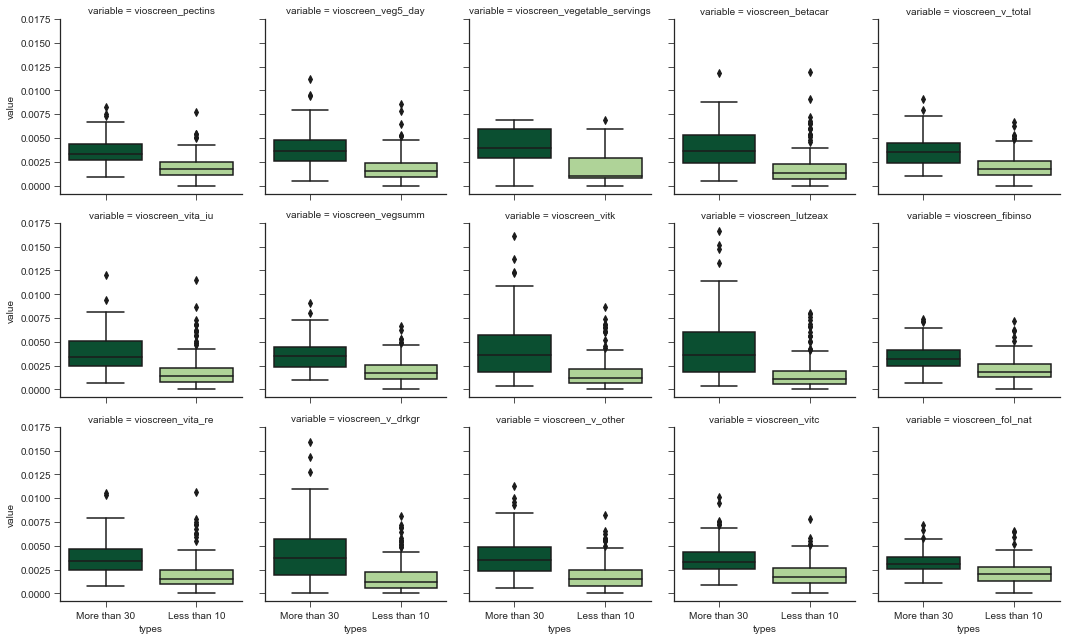

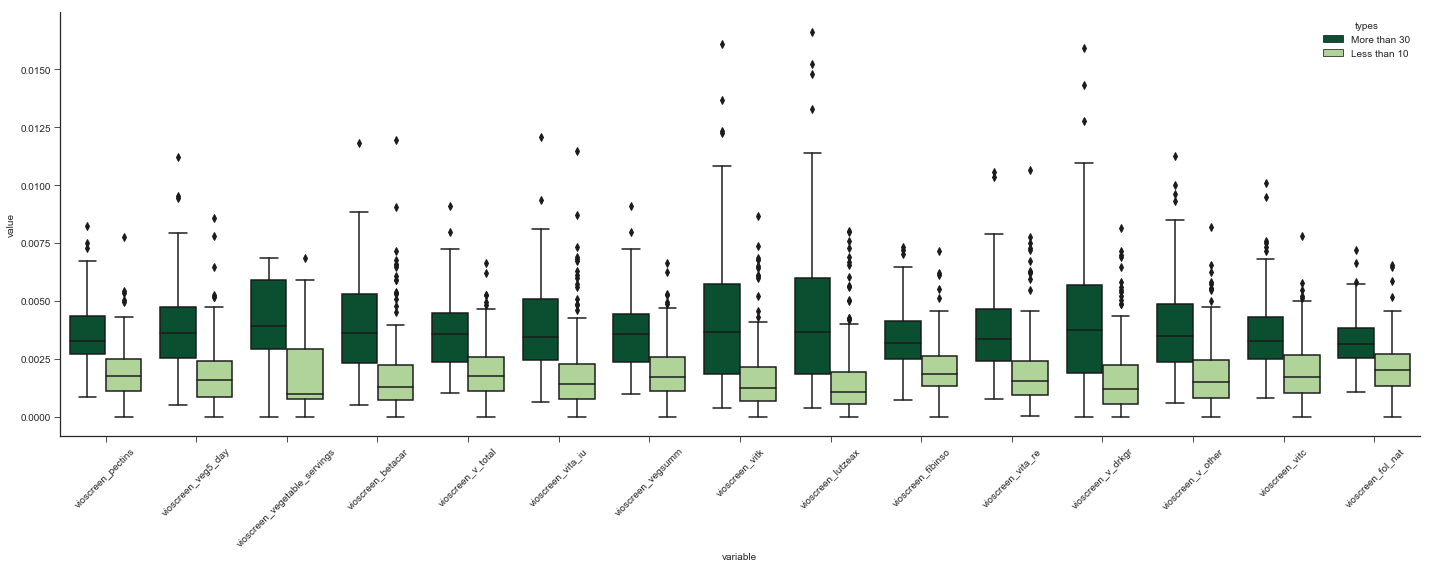

In [58]:
# boxplot
sns.set_style('ticks')
fig = sns.FacetGrid(mapping_norm_long, col="variable", col_wrap=5)
fig.map(sns.boxplot, 'types', 'value', palette=['#005a32', '#addd8e'])
fig.savefig('vioscreen_plants_boxplot_facetGrid.pdf')

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)

fig = sns.boxplot(x = 'variable', y = 'value', data=mapping_norm_long, hue='types', palette=['#005a32', '#addd8e'])
fig.set_xticklabels(ax.get_xticklabels(), rotation=45)
sns.despine()

# tight_layout
fig = fig.get_figure()
fig.tight_layout()
fig.savefig('vioscreen_plants_boxplot.pdf')